In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

class color:
    BOLD='\033[1m'
    END='\033[0m'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#One second interval between queries to stay within API query limits
time.sleep(1)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_list = []
index_counter = 0
m = 1 
set_number = 1

print("Beginning Data Retrieval")
print("--------------------------")
#mention cities one by one by using enumerate.
#can run data for 50 cities at a time so that API Calls do not time out. 
for n, city in enumerate(cities):
    
    #print("n =", n)
    #print("m =", m)
    if (n % 50 == 0 and n >= 50):
        set_number=set_number+1
        index_counter = 0
    # Get weather data
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    time.sleep(1)
    
    index_counter = index_counter + 1
    print(f"Processing Record {index_counter} of Set {set_number} | {city}")

    try:
        weather_json = weather_response.json()
        temperature = weather_json["main"]["temp"]
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        cloudiness = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        max_temp = weather_json["main"]["temp_max"]
        wind_speed = weather_json["wind"]["speed"]
        city_name = weather_json["name"]
        city_list.append({"Temperature": temperature,
                          "Latitude": latitude,
                          "Longitude": longitude,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Maximum Temperature": max_temp,
                          "Wind Speed": wind_speed,
                          "City Name": city_name})


      
    except: 
        print("City " + color.BOLD + "not " + color.END + "found. Skipping...")
        pass
    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")


Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | vao
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | atar
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | eureka
Processing Record 7 of Set 1 | pacific grove
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | dingle
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | jacareacanga
Processing Record 13 of Set 1 | tual
Processing Record 14 of Set 1 | sale
Processing Record 15 of Set 1 | cockburn harbour
City not found. Skipping...
Processing Record 16 of Set 1 | bonavista
Processing Record 17 of Set 1 | praxedis guerrero
Processing Record 18 of Set 1 | port blair
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | margate
Processing Record 22 of Set 1 | ngukurr
City not found. Skip

Processing Record 32 of Set 4 | adrar
Processing Record 33 of Set 4 | amderma
City not found. Skipping...
Processing Record 34 of Set 4 | bambous virieux
Processing Record 35 of Set 4 | husavik
Processing Record 36 of Set 4 | mahajanga
Processing Record 37 of Set 4 | jishou
Processing Record 38 of Set 4 | rio gallegos
Processing Record 39 of Set 4 | malanje
Processing Record 40 of Set 4 | muromtsevo
Processing Record 41 of Set 4 | nikolskoye
Processing Record 42 of Set 4 | ayna
Processing Record 43 of Set 4 | okha
Processing Record 44 of Set 4 | mar del plata
Processing Record 45 of Set 4 | atuona
Processing Record 46 of Set 4 | quelimane
Processing Record 47 of Set 4 | goure
Processing Record 48 of Set 4 | chivilcoy
Processing Record 49 of Set 4 | flinders
Processing Record 50 of Set 4 | maragogi
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | methoni
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 

Processing Record 21 of Set 8 | zanjan
Processing Record 22 of Set 8 | takoradi
Processing Record 23 of Set 8 | amahai
Processing Record 24 of Set 8 | buraydah
Processing Record 25 of Set 8 | sao jose da coroa grande
Processing Record 26 of Set 8 | grao mogol
Processing Record 27 of Set 8 | grand gaube
Processing Record 28 of Set 8 | maiduguri
Processing Record 29 of Set 8 | bilma
Processing Record 30 of Set 8 | skjervoy
Processing Record 31 of Set 8 | pochutla
Processing Record 32 of Set 8 | kutum
Processing Record 33 of Set 8 | machachi
Processing Record 34 of Set 8 | nanortalik
Processing Record 35 of Set 8 | ishigaki
Processing Record 36 of Set 8 | rio branco
Processing Record 37 of Set 8 | charapan
Processing Record 38 of Set 8 | athens
Processing Record 39 of Set 8 | kapit
Processing Record 40 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 41 of Set 8 | rocky mountain house
Processing Record 42 of Set 8 | stornoway
Processing Record 43 of Set 8 | moose facto

Processing Record 3 of Set 12 | itarema
Processing Record 4 of Set 12 | druzhba
Processing Record 5 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 12 | lorengau
Processing Record 7 of Set 12 | ambunti
Processing Record 8 of Set 12 | burgeo
Processing Record 9 of Set 12 | aguai
Processing Record 10 of Set 12 | arraias
Processing Record 11 of Set 12 | mudanjiang
Processing Record 12 of Set 12 | jasper
Processing Record 13 of Set 12 | udachnyy
Processing Record 14 of Set 12 | lufkin
Processing Record 15 of Set 12 | egvekinot
Processing Record 16 of Set 12 | high rock
Processing Record 17 of Set 12 | escarcega
Processing Record 18 of Set 12 | gallup
Processing Record 19 of Set 12 | saint-georges
Processing Record 20 of Set 12 | valenca
Processing Record 21 of Set 12 | chicama
Processing Record 22 of Set 12 | basco
Processing Record 23 of Set 12 | verkhnevilyuysk
Processing Record 24 of Set 12 | clayton
Processing Record 25 of Set 12 | guasdualito
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_data = pd.DataFrame(city_list)
#cities_data.to_csv = ('cities.csv', encoding = "utf-8", index_label = "City_ID")
cities_data.head()

,Temperature,Latitude,Longitude,Cloudiness,Country,Date,Humidity,Maximum Temperature,Wind Speed,City Name
0,-5.19,71.69,128.87,11,RU,1583009600,87,-5.19,8.34,Tiksi
1,80.20,-22.67,167.48,100,NC,1583009601,82,80.20,20.40,Vao
2,62.56,32.67,-17.10,75,PT,1583009602,77,66.20,2.24,Ponta do Sol
3,71.92,20.52,-13.05,0,MR,1583009603,8,71.92,6.93,Atar
4,82.24,-0.60,73.08,75,MV,1583009604,81,82.24,14.81,Hithadhoo


In [5]:
cities_data.to_csv('cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
latitude = cities_data["Latitude"]
temperature = cities_data["Temperature"]
humidity = cities_data["Humidity"]
wind_speed = cities_data["Wind Speed"]
cloudiness = cities_data["Cloudiness"]



#### Latitude vs. Temperature Plot

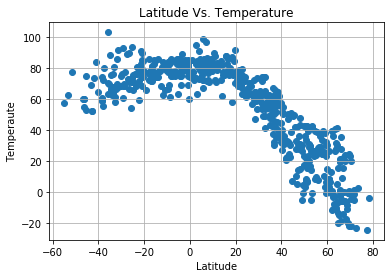

In [7]:
plt.scatter(latitude, temperature, linewidths = 1)
plt.grid(True)
plt.title("Latitude Vs. Temperature")
plt.ylabel("Temperaute")
plt.xlabel("Latitude")
plt.show()


The code is grabbing data for latitude and temperature from over 500 cities. The code is analyzing the relationship between latitude and temperature of the cities. There seems to be an almost but not quite proportional relationship between latitude and temperature. 

#### Latitude vs. Humidity Plot

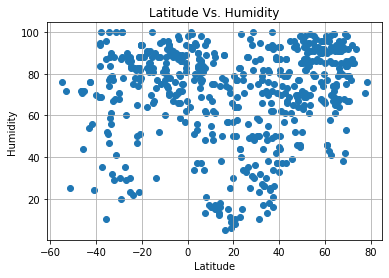

In [8]:
plt.scatter(latitude, humidity, linewidths = 1)
plt.grid(True)
plt.title("Latitude Vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()


The code is grabbing data for latitude and humidity from over 500 cities. The code is analyzing the relationship between latitude and humidity of the cities. There does not seem to be proportional relationship between latitude and humidity. 

#### Latitude vs. Cloudiness Plot

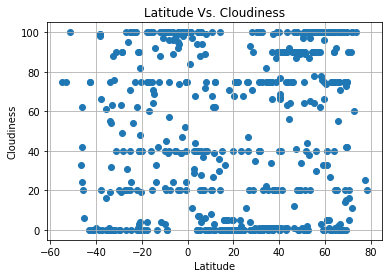

In [9]:
plt.scatter(latitude, cloudiness, linewidths = 1)
plt.grid(True)
plt.title("Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

The code is grabbing data for latitude and cloudiness from over 500 cities. The code is analyzing the relationship between latitude and cloudiness of the cities. There does not seem to be proportional relationship between latitude and cloudiness. 

#### Latitude vs. Wind Speed Plot

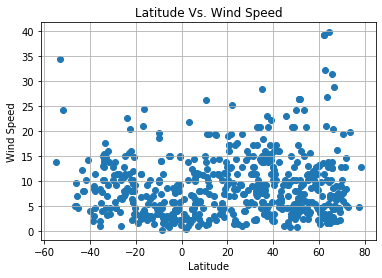

In [10]:
plt.scatter(latitude, wind_speed, linewidths = 1)
plt.grid(True)
plt.title("Latitude Vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()

The code is grabbing data for latitude and sind speed from over 500 cities. The code is analyzing the relationship between latitude and wind speed of the cities. There does not seem to be proportional relationship between latitude and wind speed. 

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()


In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern = cities_data.loc[(cities_data["Latitude"] >= 0)]
southern = cities_data.loc[(cities_data["Latitude"] < 0)]

latitude_north = northern["Latitude"]
latitude_south = southern["Latitude"]
temperature_north = northern["Maximum Temperature"]
temperature_south = southern["Maximum Temperature"]
humidity_north = northern["Humidity"]
humidity_south = southern["Humidity"]
wind_speed_north = northern["Wind Speed"]
wind_speed_south = southern["Wind Speed"]
cloudiness_north = northern["Cloudiness"]
cloudiness_south = southern["Cloudiness"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9046038046020748


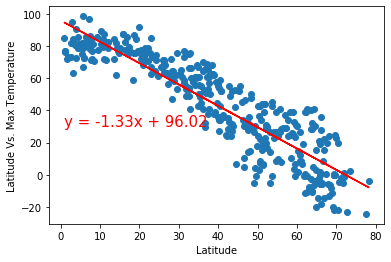

In [13]:
plot_linear_regression(latitude_north, temperature_north, "Latitude Vs. Max Temperature", (1,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4582528334784397


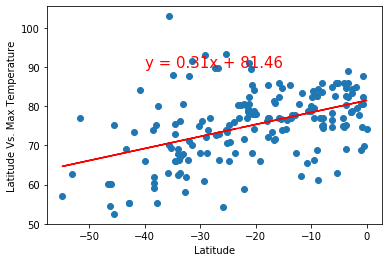

In [14]:
plot_linear_regression(latitude_south, temperature_south, "Latitude Vs. Max Temperature", (-40,90))
#For the equation to show up the coordinates must be inside the box. 

In the northern hemisphere the maximum temperature decreases as latitude increases. In the southern hemisphere the maximim temperature increases as latitude increases. The r-value for the northeren hemisphere is close to -1 so there could be a relationship between latitude and maximum temperature. The r-value for the southern hemisphere is not close to 1 so there is less of a relationship between latitude and maximum temperature in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31806442578751165


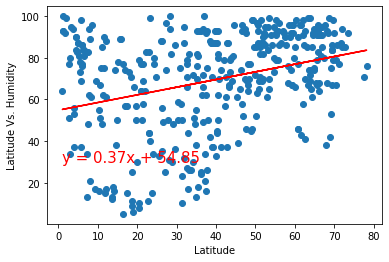

In [15]:
plot_linear_regression(latitude_north, humidity_north, "Latitude Vs. Humidity", (1,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.29073267820629045


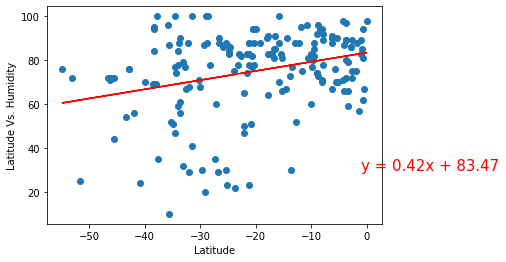

In [16]:
plot_linear_regression(latitude_south, humidity_south, "Latitude Vs. Humidity", (-1,30))

On both graphs the humidity increases as the latitude increases. The r-values are close to zero so there really is not a relationship between latitude and humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20957896918276295


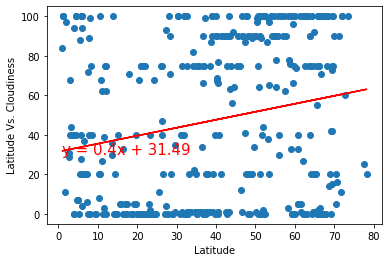

In [17]:
plot_linear_regression(latitude_north, cloudiness_north, "Latitude Vs. Cloudiness", (1,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3204091744325463


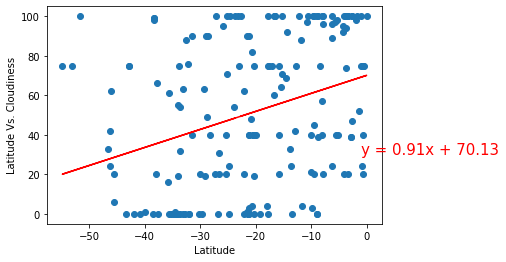

In [18]:
plot_linear_regression(latitude_south, cloudiness_south, "Latitude Vs. Cloudiness", (-1,30))

In the northern hemisphere graph the points seem all scattered everywhere. In the southern hemisphere graph cloudiness seems to increase as latitude increses. Both of the r-values for the northern and southern hemisphere are low or close to zero so there is no relationship between latitude and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08297829217899905


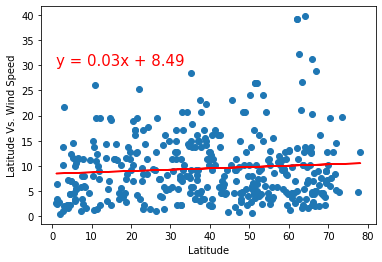

In [19]:
plot_linear_regression(latitude_north, wind_speed_north, "Latitude Vs. Wind Speed", (1,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3067611153795807


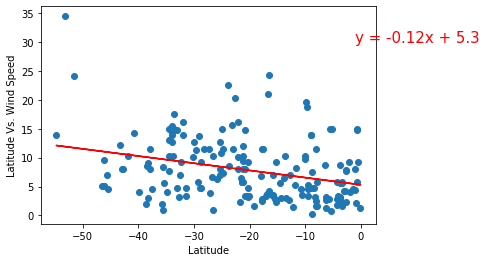

In [20]:
plot_linear_regression(latitude_south, wind_speed_south, "Latitude Vs. Wind Speed", (-1,30))

In the northern hemipshere graph the wind speed seems to stay almost the same as latitude increases. In the southern hemisphere graph the wind speed seems to decrease slightly as latitude increases. Both of the r-values are close to zero which means that there is no relationship between latitude and wind speed. 